In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns

### loading dataset

In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
df.shape

(344, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
# checking number of null values using 
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
# drop the null values
# use inplace  = True to effect the changes on the dataframe
df.dropna(inplace=True)
# cheking the df for missing values again
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Feature Engineering

In [7]:
# transforming categorical data into numeric 
# use one hot encoding
df.sex.unique()

array(['Male', 'Female'], dtype=object)

In [8]:
pd.get_dummies(df['sex']).head()

,Female,Male
0,0,1
1,1,0
2,1,0
4,1,0
5,0,1


In [9]:
# we can drop one column since only one is enough to determine if 
# the penguin is male(1) or not(0)
sex = pd.get_dummies(df['sex'], drop_first=True)
sex.head()

,Male
0,1
1,0
2,0
4,0
5,1


In [10]:
## applying one hot  to the island feature
df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
island = pd.get_dummies(df['island'], drop_first=True)
island.head()

,Dream,Torgersen
0,0,1
1,0,1
2,0,1
4,0,1
5,0,1


In [12]:
## concatenating the two data frames with the original df
df_new = pd.concat([df,island,sex], axis=1)
df_new.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen,Male
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,0,1,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,0,1,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,0,1,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,0,1,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male,0,1,1


In [13]:
df_new.shape

(333, 10)

In [14]:
## drop the redundant columns
## sex and island because we have male, dream and torgesen
df_new.drop(['sex', 'island'], axis=1, inplace=True)
df_new.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0
5,Adelie,39.3,20.6,190.0,3650.0,0,1,1


In [15]:
df_new.shape

(333, 8)

In [16]:
### store target into one variable
y = df_new.species
y.head()

0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
Name: species, dtype: object

In [17]:
### check the unique targets
y.unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [18]:
## convert the targets into numeric data uning the map function
y = y.map({'Adelie': 0, 'Chinstrap': 1, 'Gentoo': 2})
y.head()

0    0
1    0
2    0
4    0
5    0
Name: species, dtype: int64

In [19]:
## drop the target value species from the main dataframe 
## thus creating X_train and X_test (X)
df_new.drop('species', inplace=True, axis=1)
df_new.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Dream,Torgersen,Male
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1


In [20]:
X = df_new

In [22]:
## spliting the features into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)
# random  state of 0 ensure code reproduciability

In [23]:
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (233, 7)
y_train (233,)
X_test (100, 7)
y_test (100,)


### Training Random forest classifier on the training set 

In [24]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=5, criterion='entropy', random_state=0)
classifier.fit(X_train,y_train) 
## n_estimators stand for the number of decision trees

RandomForestClassifier(criterion='entropy', n_estimators=5, random_state=0)

In [26]:
## making some preditions with X_test
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2], dtype=int64)

### confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score

In [28]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[48  0  0]
 [ 2 14  0]
 [ 0  0 36]]


In [29]:
accuracy_score(y_test, y_pred)

0.98

In [34]:
### visualize the confusion matrix
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 427.9555555555555, 'Predicted label')

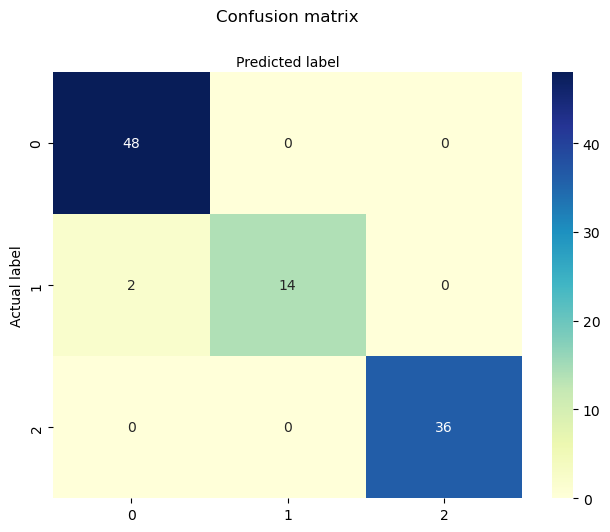

In [35]:
### visualize the confusion matrix
class_names=[0,1,2] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)


# creating heatmap
sns.heatmap(pd.DataFrame(conf_mat), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix", y=1.1)
plt.ylabel("Actual label")
plt.xlabel("Predicted label")

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



### Trying with different number of trees and gini criteria

In [31]:
classifier = RandomForestClassifier(n_estimators=8, criterion='gini', random_state=0)
classifier.fit(X_train,y_train) 
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.99